In [531]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical computing and handling arrays
import numpy as np

# Import re (regular expressions) for text processing and pattern matching
import re

# Import matplotlib for creating static plots and visualizations
import matplotlib.pyplot as plt

# Import Plotly Express for interactive visualizations
import plotly.express as px

# Set the default font for matplotlib plots to Helvetica
plt.rcParams["font.family"] = "Helvetica"

# Read the CSV file on European Ski Resorts into a DataFrame
df = pd.read_csv('/Users/benjaminmalin/Documents/European_Ski_Resorts.csv')

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450


In [532]:
# Get the shape of the DataFrame - (rows,columns)
df.shape

(376, 18)

In [533]:
# Create a copy of the DataFrame
df_new = df.copy()

# Grouped duplicate resorts in shared ski areas
grouped_cols = ["HighestPoint", "LowestPoint", "TotalSlope", "TotalLifts"]
df_new["SharedSkiArea"] = df_new.groupby(grouped_cols)["Resort"].transform(lambda x: ', '.join(x))

# Drop duplicate ski areas and update Resort column
df_new = df_new.drop_duplicates(subset=grouped_cols).copy()
df_new["Resort"] = df_new["SharedSkiArea"]
df_new.drop(columns=["SharedSkiArea"], inplace=True)


In [534]:
# Get the shape of the new DataFrame - (rows,columns)
df_new.shape

(351, 18)

In [535]:
# Get column names
df_new.columns

Index(['Unnamed: 0', 'Resort', 'Country', 'HighestPoint', 'LowestPoint',
       'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
       'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons'],
      dtype='object')

In [536]:
# Check data types
df.dtypes

Unnamed: 0            int64
Resort               object
Country              object
HighestPoint          int64
LowestPoint           int64
DayPassPriceAdult     int64
BeginnerSlope         int64
IntermediateSlope     int64
DifficultSlope        int64
TotalSlope            int64
Snowparks            object
NightSki             object
SurfaceLifts          int64
ChairLifts            int64
GondolaLifts          int64
TotalLifts            int64
LiftCapacity          int64
SnowCannons           int64
dtype: object

In [537]:
 # 01 Total number of Ski Resorts in Europe
total_resorts = df_new["Resort"].nunique()
print(f"Total number of ski resorts in Europe: {total_resorts}")

# 02 Average cost for a day pass
mean_day_pass_price = df_new["DayPassPriceAdult"].mean()
print(f"Average cost for a day pass: €{mean_day_pass_price:.2f}")

# 03 Total number of Ski lifts 
total_lifts = df_new["TotalLifts"].sum()
print(f"Total number of ski lifts: {total_lifts}")

# 04 Lowest Skiable point
lowest_point = df_new["LowestPoint"].min()
lowest_resort = df_new[df_new["LowestPoint"] == lowest_point]["Resort"].values[0]
print(f"Lowest skiable point: {lowest_point}m at {lowest_resort}")

# 05 Highest Skiable point
highest_point = df_new["HighestPoint"].max()
highest_resort = df_new[df_new["HighestPoint"] == highest_point]["Resort"].values[0]
print(f"Highest skiable point: {highest_point}m at {highest_resort}")

# 06 Total skiable terrain
total_skiable_terrain = df_new["TotalSlope"].sum()
print(f"Total skiable terrain: {total_skiable_terrain} km")

# 07 Total number of countries
total_countries = df_new["Country"].nunique()
print(f"Total skiable countries: {total_countries}")

# 08 Total number of snow parks
snow_parks = df_new[df_new["Snowparks"] == "Yes"].shape[0]
print(f"Total number of snow parks: {snow_parks}")

# 09 Total number of night ski
night_ski = df_new[df_new["NightSki"] == "Yes"].shape[0]
print(f"Total number of resorts with night ski: {night_ski}")

# 10 Average number of snow cannons
snow_cannon = df_new["SnowCannons"].mean()
print(f"Average number of snow cannons: {snow_cannon}")


Total number of ski resorts in Europe: 351
Average cost for a day pass: €39.76
Total number of ski lifts: 7601
Lowest skiable point: 0m at Copenhagen (planned)
Highest skiable point: 3899m at Cervinia, Zermatt - Matterhorn
Total skiable terrain: 23223 km
Total skiable countries: 27
Total number of snow parks: 255
Total number of resorts with night ski: 135
Average number of snow cannons: 160.95156695156695


In [538]:
# Drop the columns not needed
df_new = df_new.drop(columns=["Unnamed: 0", "Snowparks", "NightSki", "SnowCannons"])

In [539]:
# Add new columns for slope density, lift capacity per slope and cost per Km
df_new['SlopeDensity'] = df_new['TotalSlope'] / df_new['TotalLifts']

df_new['LiftCapacityPerSlope'] = df_new['LiftCapacity'] / df_new['TotalSlope']

df_new["CostPerKm"] = df_new["DayPassPriceAdult"] / df_new["TotalSlope"]


In [540]:
df_new

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SlopeDensity,LiftCapacityPerSlope,CostPerKm
0,"Alpendorf (Ski amedé), Wagrain (Ski amedé), Fl...",Austria,1980,740,52,30,81,4,115,22,16,11,49,75398,2.346939,655.634783,0.452174
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,37,28,7,72,99017,2.916667,471.509524,0.223810
2,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,2,0,0,2,1932,1.000000,966.000000,15.000000
3,Dachstein West,Austria,1620,780,42,15,33,3,51,25,8,3,36,32938,1.416667,645.843137,0.823529
4,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,6,11,10,27,49228,2.851852,639.324675,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Stubai Glacier,Austria,3212,1697,46,19,15,4,38,14,7,5,26,39784,1.461538,1046.947368,1.210526
368,Elfer Neustift,Austria,2080,981,29,0,7,0,7,3,0,1,4,2980,1.750000,425.714286,4.142857
369,Val Gardena,Italy,2518,1236,54,52,105,18,175,29,41,14,84,121914,2.083333,696.651429,0.308571
373,"Gressoney - La-Trinite (Monterosa Ski), Champo...",Italy,3275,1212,43,23,94,15,132,9,9,12,30,31984,4.400000,242.303030,0.325758


In [541]:
# Check for null values in the modified dataframe
df_new.isnull().sum()

Resort                  0
Country                 0
HighestPoint            0
LowestPoint             0
DayPassPriceAdult       0
BeginnerSlope           0
IntermediateSlope       0
DifficultSlope          0
TotalSlope              0
SurfaceLifts            0
ChairLifts              0
GondolaLifts            0
TotalLifts              0
LiftCapacity            0
SlopeDensity            7
LiftCapacityPerSlope    4
CostPerKm               4
dtype: int64

In [542]:
# Replace inf values with nan to be managed
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with a default value
df_new["SlopeDensity"] = df_new["SlopeDensity"].fillna(0)
df_new["LiftCapacityPerSlope"] = df_new["LiftCapacityPerSlope"].fillna(df_new["LiftCapacityPerSlope"].median())
df_new["CostPerKm"] = df_new["CostPerKm"].fillna(df_new["CostPerKm"].median())

df_new.isnull().sum()

Resort                  0
Country                 0
HighestPoint            0
LowestPoint             0
DayPassPriceAdult       0
BeginnerSlope           0
IntermediateSlope       0
DifficultSlope          0
TotalSlope              0
SurfaceLifts            0
ChairLifts              0
GondolaLifts            0
TotalLifts              0
LiftCapacity            0
SlopeDensity            0
LiftCapacityPerSlope    0
CostPerKm               0
dtype: int64

In [543]:
# Define a function to shorten shared ski areas and extract the group name
def extract_group_name(resort_name):
    match = re.search(r'\((.*?)\)', resort_name)
    if match:
        return match.group(1)  
    else:
        return resort_name 

df_new["Resort"] = df_new["Resort"].apply(lambda x: extract_group_name(x))

df_new.head() 

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SlopeDensity,LiftCapacityPerSlope,CostPerKm
0,Ski amedé,Austria,1980,740,52,30,81,4,115,22,16,11,49,75398,2.346939,655.634783,0.452174
1,Grandvalira,Andorra,2640,1710,47,100,77,33,210,37,28,7,72,99017,2.916667,471.509524,0.223810
2,Wildschönau,Austria,1130,900,30,1,0,1,2,2,0,0,2,1932,1.000000,966.000000,15.000000
3,Dachstein West,Austria,1620,780,42,15,33,3,51,25,8,3,36,32938,1.416667,645.843137,0.823529
4,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,6,11,10,27,49228,2.851852,639.324675,0.285714


In [544]:
df_new.describe()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SlopeDensity,LiftCapacityPerSlope,CostPerKm
count,351.000000,351.000000,351.000000,351.00000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,1998.196581,1051.937322,39.763533,27.37037,29.689459,8.820513,66.162393,11.444444,7.304843,2.905983,21.655271,26945.071225,3.031639,493.443631,1.738838
std,764.128474,430.879269,12.075403,35.46684,35.796853,12.006152,76.299780,10.916916,8.859600,4.408400,21.330681,31163.615251,3.249959,381.257753,4.322949
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1470.000000,771.000000,33.000000,7.00000,9.000000,2.000000,23.500000,5.000000,2.000000,0.000000,9.000000,10269.500000,1.912562,295.752273,0.493407
50%,2060.000000,1046.000000,41.000000,18.00000,20.000000,5.000000,43.000000,9.000000,5.000000,1.000000,16.000000,17774.000000,2.704762,427.142857,0.866667
75%,2511.500000,1358.500000,47.500000,31.50000,35.500000,11.000000,79.500000,14.500000,8.500000,4.000000,25.000000,31026.500000,3.677521,585.336947,1.415650
max,3899.000000,2180.000000,81.000000,312.00000,239.000000,103.000000,600.000000,89.000000,74.000000,40.000000,174.000000,252280.000000,56.000000,5231.000000,54.000000


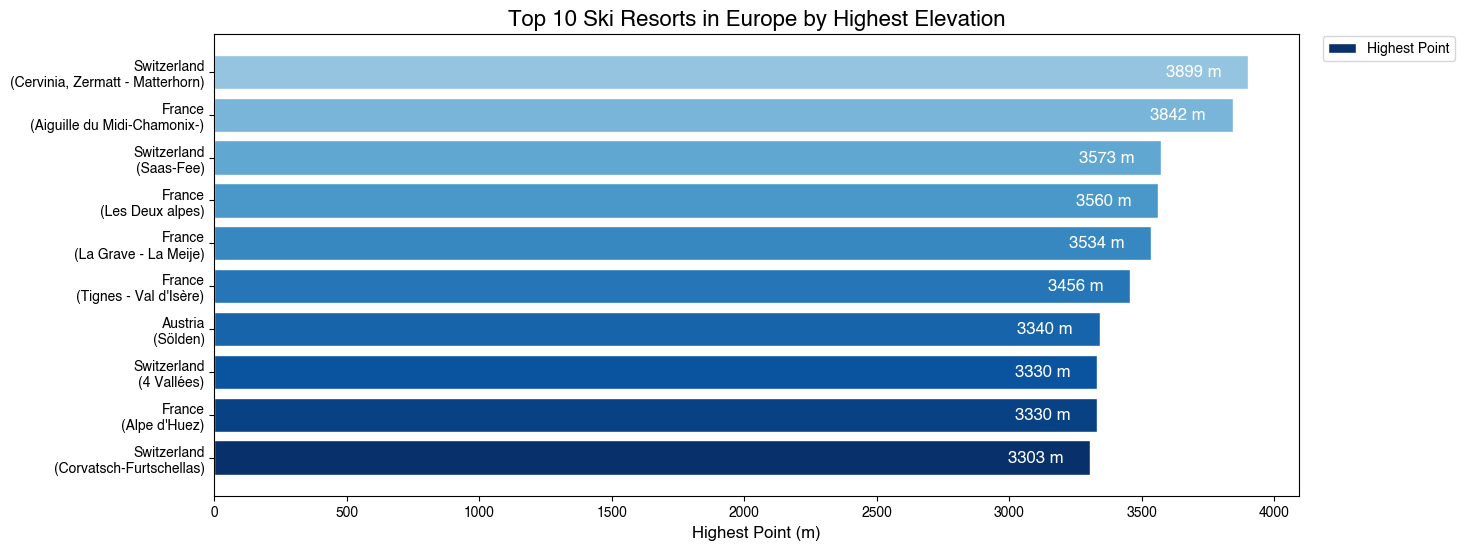

In [545]:

# Sort by highest point
top_resorts_highest = df_new.nlargest(10, "HighestPoint").copy()
top_resorts_highest = top_resorts_highest.sort_values("HighestPoint", ascending=True)

# Create new column for labels (country then resort)
top_resorts_highest["Resorts"] = top_resorts_highest["Country"] + "\n(" + top_resorts_highest["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 30 else x) + ")"

# Define color in a gradient
colors = plt.cm.Blues(np.linspace(1, 0.4, len(top_resorts_highest)))

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Create bars
bars = ax.barh(top_resorts_highest["Resorts"], top_resorts_highest["HighestPoint"], color=colors, edgecolor="white")

# Add elevation labels inside bars
for bar, value in zip(bars, top_resorts_highest["HighestPoint"]):
    ax.text(bar.get_width() - 100, bar.get_y() + bar.get_height()/2, f"{value} m", 
            ha='right', va='center', fontsize=12, color='white', fontweight='bold')

# Labels and title
ax.set_xlabel("Highest Point (m)", fontsize=12)
ax.set_title("Top 10 Ski Resorts in Europe by Highest Elevation", fontsize=16)

# Remove gridlines
ax.grid(False)

# Add legend
plt.legend(["Highest Point"], loc="upper right", bbox_to_anchor=(1.15, 1.01))

# Show plot
plt.show()


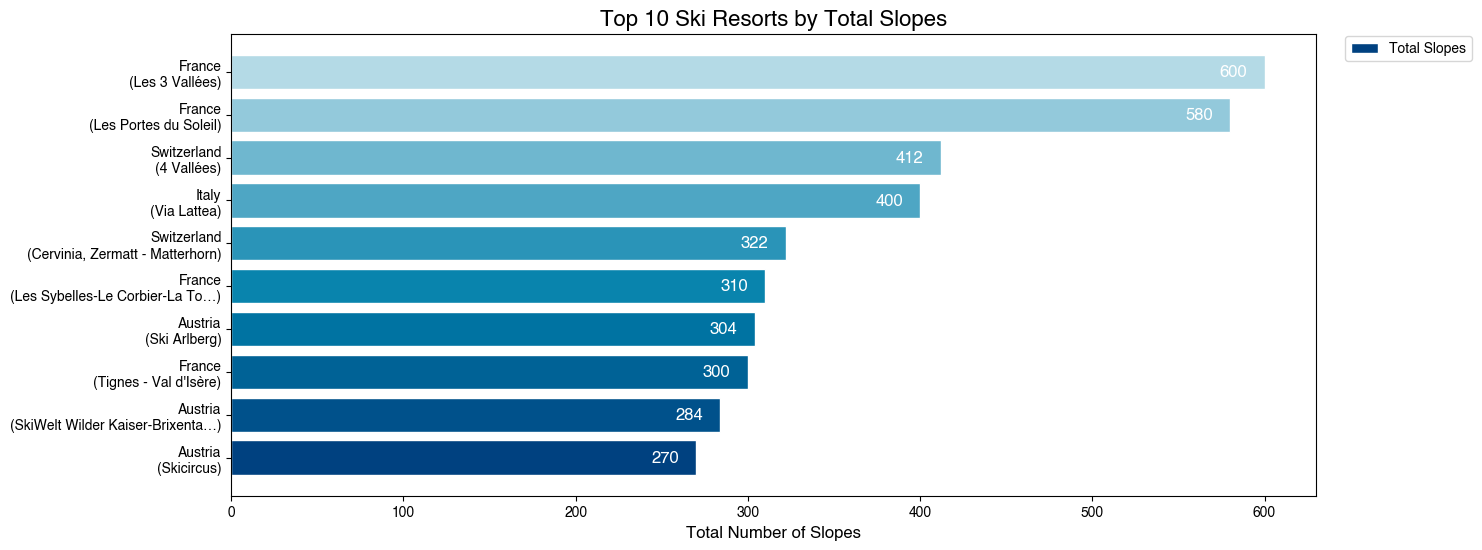

In [546]:


# Sort by total slopes
top_resorts_slopes = df_new.nlargest(10, "TotalSlope").copy()
top_resorts_slopes = top_resorts_slopes.sort_values(by=["TotalSlope"], ascending=True)

# Create new column for labels (country then resort)
top_resorts_slopes["Resorts"] = top_resorts_slopes["Country"] + "\n(" + \
    top_resorts_slopes["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 30 else x) + ")"

# Define color in a gradient
colors_slopes = plt.cm.ocean(np.linspace(0.5, 0.9, len(top_resorts_slopes)))

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Create bars
bars = ax.barh(top_resorts_slopes["Resorts"], top_resorts_slopes["TotalSlope"], 
               color=colors_slopes, edgecolor="white") 

# Add total slope labels inside bars
for bar, value in zip(bars, top_resorts_slopes["TotalSlope"]): 
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2, f"{value}", 
            ha='right', va='center', fontsize=12, color='white', fontweight='bold')

# Labels and title
ax.set_xlabel("Total Number of Slopes", fontsize=12)
ax.set_title("Top 10 Ski Resorts by Total Slopes", fontsize=16)

# Remove gridlines
ax.grid(False)

# Add legend
plt.legend(["Total Slopes"], loc="upper right", bbox_to_anchor=(1.15, 1.01))

# Show plot
plt.show()



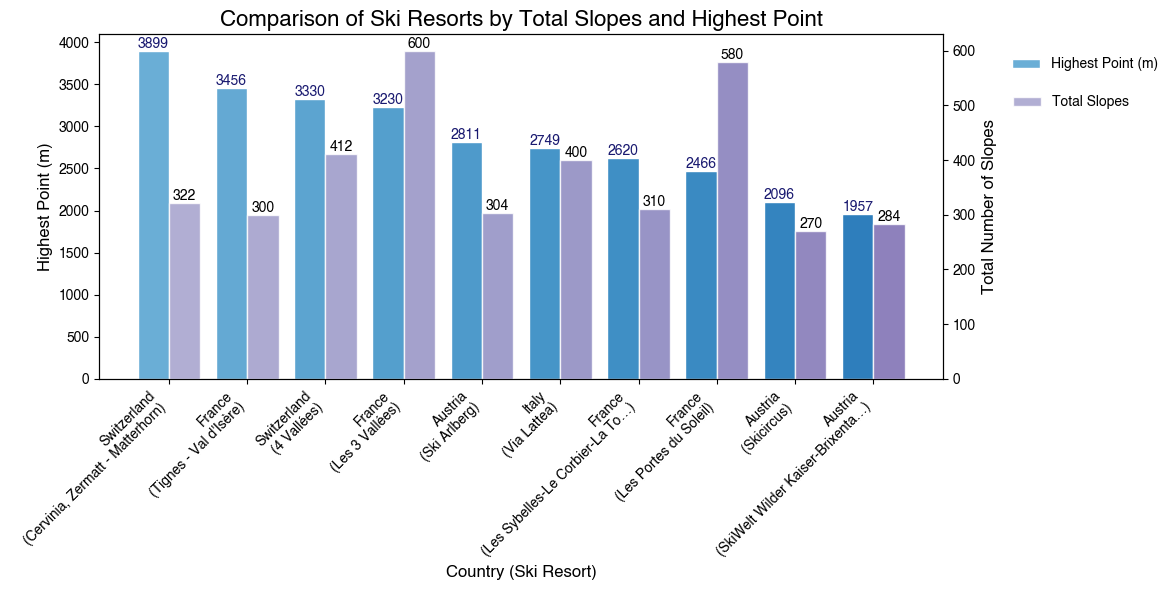

In [547]:


# Select top 10 resorts by TotalSlope and HighestPoint
top_resorts = df_new.nlargest(10, ["TotalSlope", "HighestPoint"]).copy()

# Sort by HighestPoint
top_resorts = top_resorts.sort_values(by=["HighestPoint"], ascending=False)

# Create new column for labels (shortened resort names)
top_resorts["Resorts"] = top_resorts["Country"] + "\n(" + \
    top_resorts["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 30 else x) + ")"

# Define x values and bar width
bar_width = 0.4
x = np.arange(len(top_resorts))  

# Define colours
colors_highest = plt.cm.Blues(np.linspace(0.5, 0.7, len(top_resorts))) 
colors_slopes = plt.cm.Purples(np.linspace(0.5, 0.7, len(top_resorts)))  

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for Highest Point
bars1 = ax1.bar(x - bar_width/2, top_resorts["HighestPoint"], bar_width, 
                color=colors_highest, edgecolor="white", label="Highest Point (m)")

# Labels and title for the primary axis
ax1.set_ylabel("Highest Point (m)", fontsize=12)
ax1.set_xlabel("Country (Ski Resort)", fontsize=12)
ax1.set_title("Comparison of Ski Resorts by Total Slopes and Highest Point", fontsize=16)

# Set x-axis tick labels
ax1.set_xticks(x)
ax1.set_xticklabels(top_resorts["Resorts"], rotation=45, ha="right")

# Create bars for Total Slopes on secondary axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, top_resorts["TotalSlope"], bar_width, 
                color=colors_slopes, edgecolor="white", label="Total Slopes", alpha=0.8)

# Labels for secondary axis
ax2.set_ylabel("Total Number of Slopes", fontsize=12)

for bar, value in zip(bars1, top_resorts["HighestPoint"]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='midnightblue')

for bar, value in zip(bars2, top_resorts["TotalSlope"]):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{value}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Legends
ax1.legend(loc="upper right", title=" ", bbox_to_anchor=(1.27, 1.03), frameon=False)
ax2.legend(loc="upper right", title=" ", bbox_to_anchor=(1.235, 0.92), frameon=False)

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()


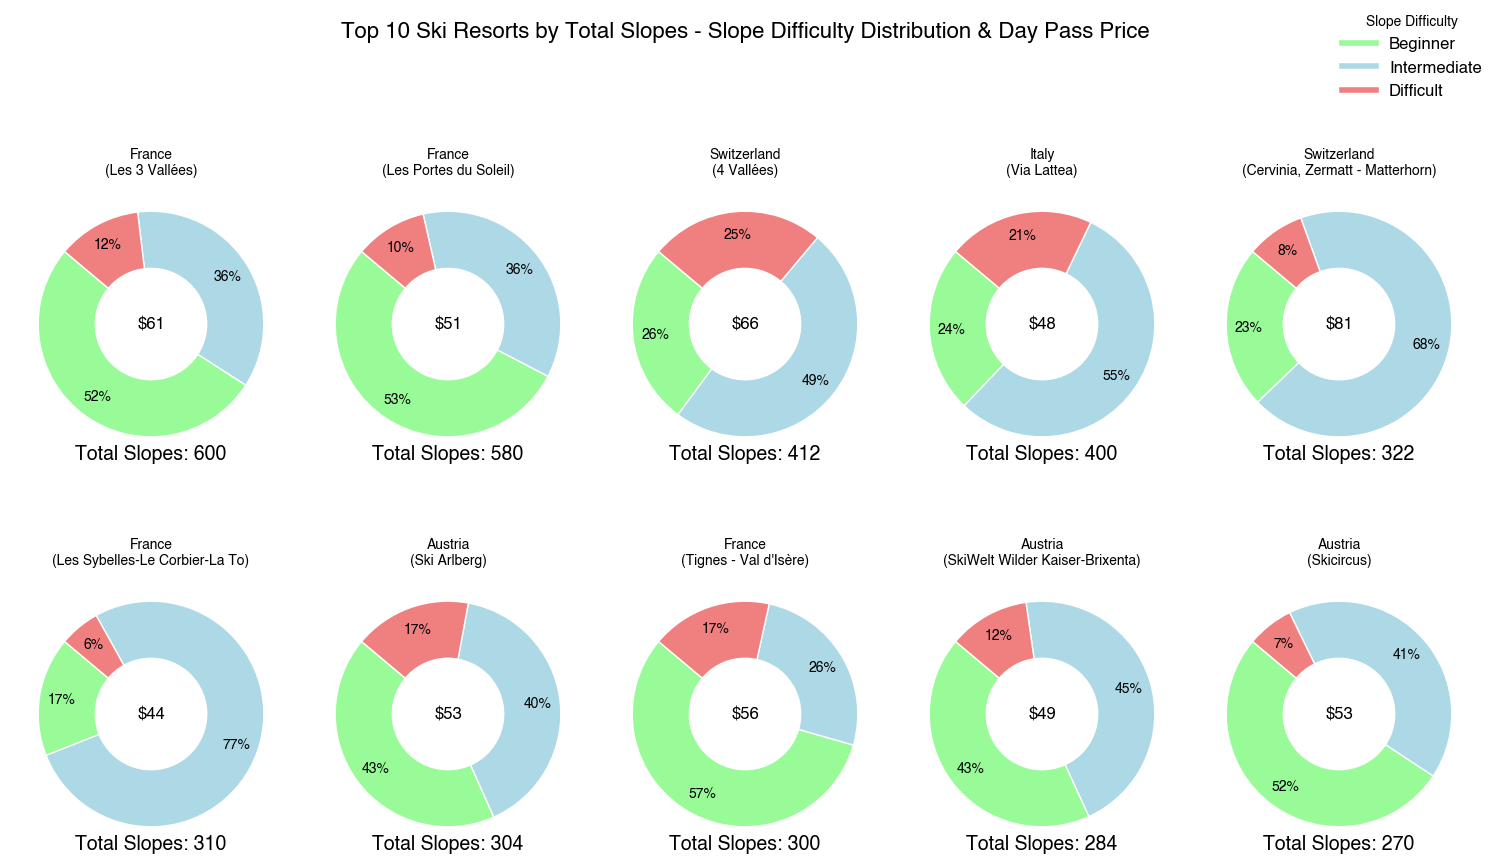

In [548]:
# Donut pie chart to show comparison of Top 10 resorts by total slopes + slope difficulty distribution and day pass price

# Select the top 10 resorts by total slopes
top_10_total_slope = df_new.nlargest(10, "TotalSlope")

# Sort resorts by total slopes ascending
top_10_total_slope = top_10_total_slope.sort_values("TotalSlope", ascending=False)

# Define labels and colours 
colors = ["palegreen", "lightblue", "lightcoral"]
labels = ["Beginner", "Intermediate", "Difficult"]

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 10))  
axes = axes.flatten()  

for i, (index, resort) in enumerate(top_10_total_slope.iterrows()):
    ax = axes[i]
    
    sizes = [resort["BeginnerSlope"], resort["IntermediateSlope"], resort["DifficultSlope"]]
    
    wedges, texts, autotexts = ax.pie(
        sizes, autopct='%1.0f%%', colors=colors, startangle=140,
        wedgeprops={'edgecolor': 'white'}, pctdistance=0.80
    )
    
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    ax.add_artist(centre_circle)
    
    # Add day pass price text to centre
    ax.text(0, 0, f"${resort['DayPassPriceAdult']}", fontsize=12, fontweight="bold", ha='center', va='center')
    
    # Set title with country and shorter resort name
    ax.set_title(f"{resort['Country']}\n({resort['Resort'][:30]})", fontsize=10)

    # Add total slopes for pie charts
    ax.text(0, -1.2, f"Total Slopes: {resort['TotalSlope']}", fontsize=14, ha='center')

# Remove empty subplots
for x in range(i + 1, len(axes)):
    fig.delaxes(axes[x])

# Add legend
fig.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in colors], 
           labels=labels, loc="upper right", fontsize=12, title="Slope Difficulty", frameon=False)

# Title and adjust layout
plt.suptitle("Top 10 Ski Resorts by Total Slopes - Slope Difficulty Distribution & Day Pass Price", fontsize=16)
plt.subplots_adjust(top=0.98, bottom=0.10, right=0.88) 

plt.tight_layout()
plt.show()

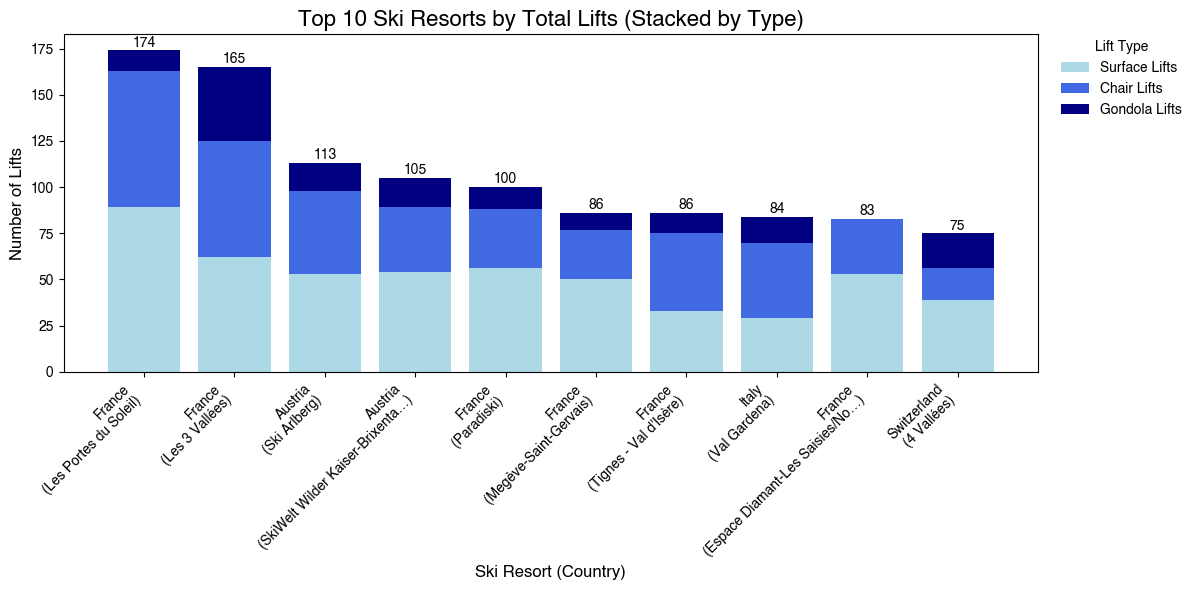

In [549]:
# Stacked bar chart to show top 10 resorts by total lifts (stacked by type)

# Get top 10 resorts by Total Lifts
top_resorts_lifts = df_new.nlargest(10, "TotalLifts").copy()

# Create formatted labels for the resorts
top_resorts_lifts["Formatted"] = top_resorts_lifts["Country"] + "\n(" + \
    top_resorts_lifts["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 30 else x) + ")"

# Set figure size
plt.figure(figsize=(12, 6))

# Define the bar positions
x = np.arange(len(top_resorts_lifts))

# Plot stacked bars
bars1 = plt.bar(x, top_resorts_lifts["SurfaceLifts"], color='lightblue', label="Surface Lifts")
bars2 = plt.bar(x, top_resorts_lifts["ChairLifts"], bottom=top_resorts_lifts["SurfaceLifts"], color='royalblue', label="Chair Lifts")
bars3 = plt.bar(x, top_resorts_lifts["GondolaLifts"], bottom=top_resorts_lifts["SurfaceLifts"] + top_resorts_lifts["ChairLifts"], 
        color='navy', label="Gondola Lifts")

# Add labels and title
plt.ylabel("Number of Lifts", fontsize=12)
plt.xlabel("Ski Resort (Country)", fontsize=12)
plt.title("Top 10 Ski Resorts by Total Lifts (Stacked by Type)", fontsize=16)

# Set x-axis tick labels
plt.xticks(x, top_resorts_lifts["Formatted"], rotation=45, ha="right")

# Add total lifts as annotations
for i, total in enumerate(top_resorts_lifts["TotalLifts"]):
    plt.text(x[i], total + 2, f"{total}", ha='center', fontsize=10, color='black')

# Add legend
plt.legend(title="Lift Type", loc="upper right", bbox_to_anchor=(1.16, 1.02), frameon=False)

# Remove gridlines
plt.grid(False)

plt.tight_layout()
plt.show()


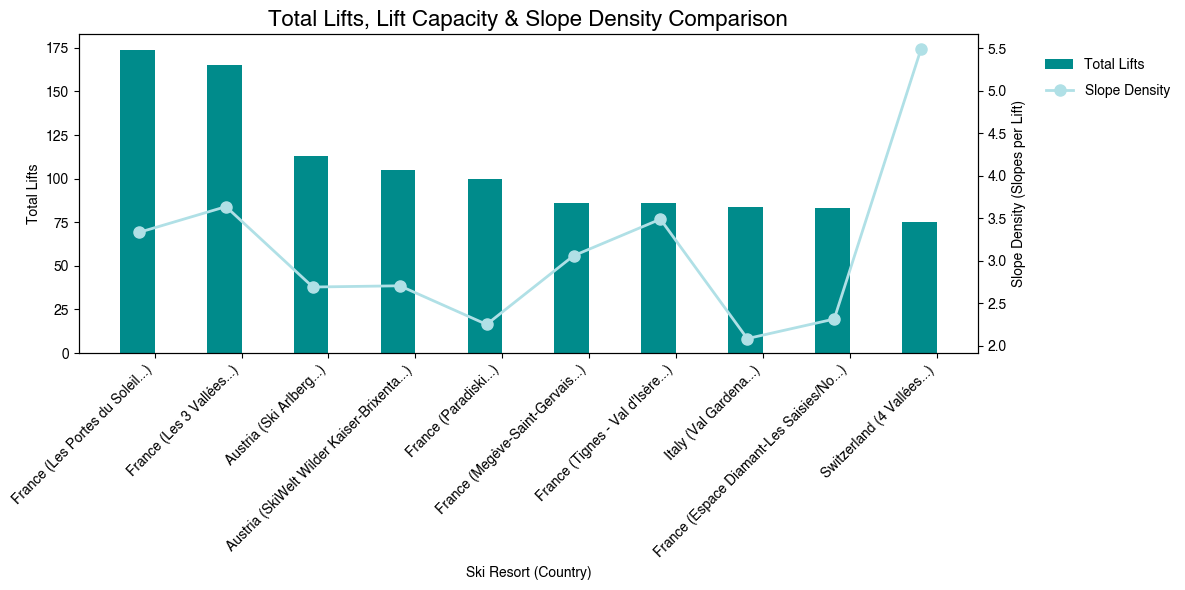

In [550]:

# Get top 10 resorts by Total Lifts
top_resorts_lifts = df_new.nlargest(10, "TotalLifts").copy()

# Calculate Slope Density
top_resorts_lifts["SlopeDensity"] = top_resorts_lifts["TotalSlope"] / top_resorts_lifts["TotalLifts"]

# Create formatted labels for the resorts
top_resorts_lifts["Formatted"] = top_resorts_lifts["Country"] + " (" + top_resorts_lifts["Resort"].str[:30] + "...)"

# Define bar width
bar_width = 0.4
x = np.arange(len(top_resorts_lifts))

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Total Lifts
ax1.bar(x - bar_width/2, top_resorts_lifts["TotalLifts"], bar_width, color='darkcyan', label="Total Lifts")

# Create secondary axis for Slope Density
ax2 = ax1.twinx()
ax2.plot(x - 0.18, top_resorts_lifts["SlopeDensity"], color='powderblue', marker='o', linestyle='-', linewidth=2, markersize=8, label="Slope Density")

# Labels and title
ax1.set_ylabel("Total Lifts")
ax2.set_ylabel("Slope Density (Slopes per Lift)", color="black")
ax1.set_xlabel("Ski Resort (Country)")
ax1.set_title("Total Lifts, Lift Capacity & Slope Density Comparison", fontsize=16)

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(top_resorts_lifts["Formatted"], rotation=45, ha="right")


# Legends
ax1.legend(loc="upper right", title=" ", bbox_to_anchor=(1.20, 1.03),frameon=False)
ax2.legend(loc="upper right", title=" ", bbox_to_anchor=(1.228, 0.95),frameon=False)

# Remove gridlines 
ax1.grid(False)  
ax2.grid(False) 

plt.tight_layout()
plt.show()


In [551]:


# Select Top 10 resorts by most expensive day pass
top_10_expensive = df_new.nlargest(10, "DayPassPriceAdult").copy()

# Shorten resort names
top_10_expensive["Resorts"] = top_10_expensive["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 20 else x)

# Sort by acending price
top_10_expensive = top_10_expensive.sort_values("DayPassPriceAdult", ascending=True)

# Create bar chart
fig = px.bar(
    top_10_expensive,
    x="DayPassPriceAdult",
    y="Resorts",
    orientation="h",
    color="DayPassPriceAdult",
    color_continuous_scale="Blues",
    labels={"DayPassPriceAdult": "Day Pass Price ($)"},
    title="Top 10 Most Expensive Ski Resorts (Day Pass Price)",
)

# Adjust layout
fig.update_layout(
    plot_bgcolor='#d2d2d2',
    yaxis=dict(categoryorder="total ascending"), 
    margin=dict(l=200, r=40, t=50, b=40),
    height=700, 
)

fig.show()


In [552]:


# Select top 10 resorts by skiable terrain
top_10_skiable = df_new.nlargest(10, "TotalSlope").copy()

# Ensure slopes in resort are more than 0
df_new = df_new[df_new["TotalSlope"] > 0].copy()

# Shorten resort names 
top_10_skiable["Resorts"] = top_10_skiable["Resort"].apply(lambda x: x[:30] + "…" if len(x) > 20 else x)

# Sort slope values by ascending
top_10_skiable = top_10_skiable.sort_values("TotalSlope", ascending=True)

# Create bar chart
fig = px.bar(
    top_10_skiable,
    x="TotalSlope",
    y="Resorts",  
    orientation="h",
    color="CostPerKm", 
    color_continuous_scale="Blues", 
    labels={"TotalSlope": "Total Skiable Terrain (km)", "CostPerKm": "Cost per km ($)"},
    title="Top 10 Ski Resorts by Skiable Terrain - Cost per km Comparison",
)

# Extend bar length 
max_slope = top_10_skiable["TotalSlope"].max()
fig.update_xaxes(range=[0, max_slope * 1.2])  

# Add annotations with cost per km
for i, row in top_10_skiable.iterrows():
    fig.add_annotation(
        x=row["TotalSlope"] + (max_slope * 0.05), 
        y=row["Resorts"],
        text=f"${row['CostPerKm']:.2f}/km",
        showarrow=False,
        font=dict(size=12, color="black"),
    )

# Adjust layout 
fig.update_layout(
    plot_bgcolor='#d2d2d2', 
    yaxis=dict(categoryorder="total ascending"),  
    margin=dict(l=200, r=40, t=50, b=40),  
    height=700,  
)

# Show the chart
fig.show()
